In [70]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from PyEMD import EMD, EEMD
import numpy as np
from sklearn.decomposition import PCA
from src.features.utilities import chop_timeseries

import src.features 

ModuleNotFoundError: No module named 'utilities'

![alt text for screen readers](Approach.png)

In [71]:
# Load data
with open('data/Case_2_a_only_basic_DQ', 'rb') as f:
    ((data1_1_df, data1_2_df, data1_3_df),(mean1_df,std1_df)) = pickle.load(f)

data1_df = pd.concat([data1_1_df,data1_2_df,data1_3_df],axis=0)
data1_df = data1_df * std1_df + mean1_df

(imin,_) = next((i, el) for i, el in enumerate(data1_df.HDEP.values) if el < 200)
data_df = data1_df.iloc[imin:]

In [72]:
data_df.keys()

Index(['ASMATN1_T', 'ASMDEP1_T', 'ASMDEP2_T', 'ASMDEP3_T', 'ASMDOFF_T',
       'ASMECD1_T', 'ASMECD2_T', 'ASMMALM1_T', 'ASMPAM1_T', 'ASMPAM2_T',
       'ASMPAM3_T', 'ASMPIM1_T', 'ASMRGM1_T', 'ASMTVD1_T', 'ASMTVD2_T',
       'ASMTVD3_T', 'ASMAAM1_T', 'ASMAAZM1_T', 'AV__CTR_TEST', 'AV__CCI_TIME',
       'AV__CTR___FINAL_ACCURATELY', 'AV__CTR___ACCURATE', 'BDTV', 'BPOS',
       'BSZ', 'CCA__CTR___FINAL_ACCURATELY', 'CCA__CTR_TEST',
       'CCA__CTR___ACCURATE', 'CCI', 'CSTK', 'CTDA', 'CTDI', 'CTR__CTR_TEST',
       'CTR__CTR___FINAL_ACCURATELY', 'CTR__CTR___ACCURATE', 'DEP',
       'DHT001_DEPTH', 'DHT001_DEPTH_OFFSET', 'DHT001_ECD', 'DHT001_EMW',
       'DHT001_ESD', 'DHT001_NOV_TVD', 'DHT001_PRESS_ANN_MEAN',
       'DHT001_PRESS_INT_MEAN', 'DHT001_ROT_GYRO_MEAN',
       'DHT001_TEMP_PCB_MEAN__DOWNHOLE_TIME', 'DHT001_TEMP_PCB_MEAN__ASM_TIME',
       'DMIAVG', 'DMOAVG', 'EWTEMP_T', 'FLIAVG', 'FLOAVG', 'GDSS_T',
       'GDTVSS_T', 'GHCAVG', 'GHCMAX', 'HCLEAN', 'HCLEANS1', 'HCLEANS2',
     

- FLIAVG, FLOAVG, ASMDEP1, 2, 3, ASMPAM1, 2, 4, HDEP, 

- Finn et område hvor all data er tilgjengelig, hent ut det intervallet
- Lag IMF av alle variabler, hent ut features

In [73]:
data = data_df[["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T", "FLIAVG", "FLOAVG", "HKLDAV", "ROPA"]].iloc[1130000:1230000]

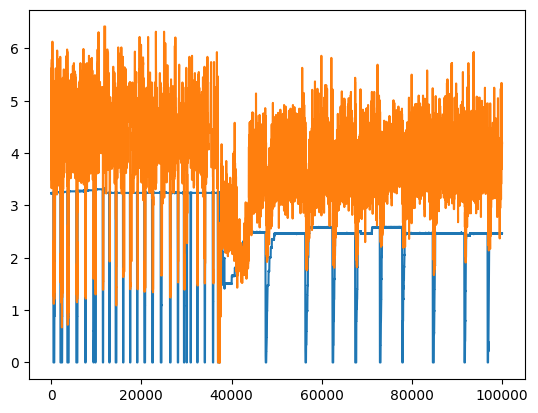

In [74]:
plt.plot(data[["FLIAVG", "FLOAVG"]].values)

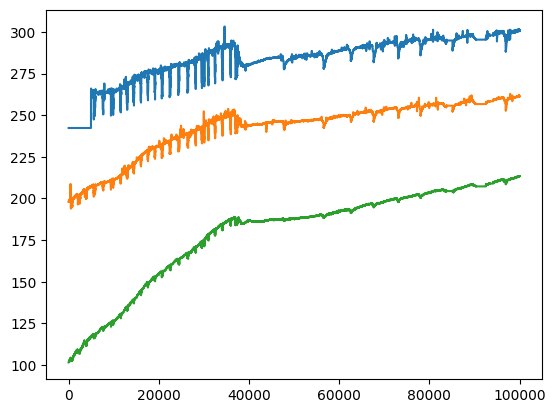

In [75]:
plt.plot(data[["ASMPAM1_T", "ASMPAM2_T", "ASMPAM3_T"]].values)

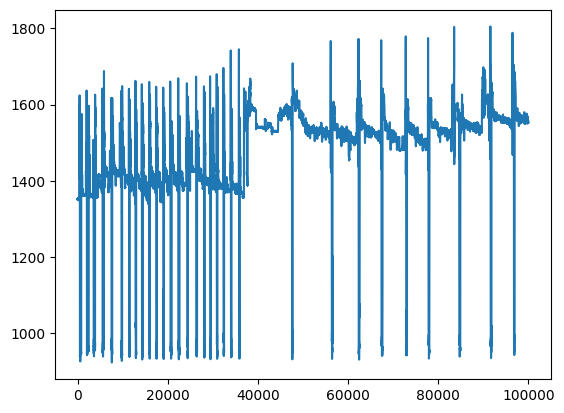

In [76]:
plt.plot(data["HKLDAV"].values)

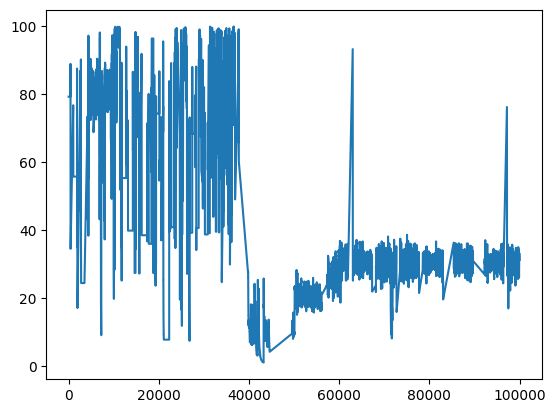

In [77]:
plt.plot(data[["ROPA"]].values)

In [78]:
data.mean()

ASMPAM1_T     283.414657
ASMPAM2_T     242.210855
ASMPAM3_T     179.197181
FLIAVG          2.503425
FLOAVG          3.774538
HKLDAV       1469.502046
ROPA           40.037923
dtype: float64

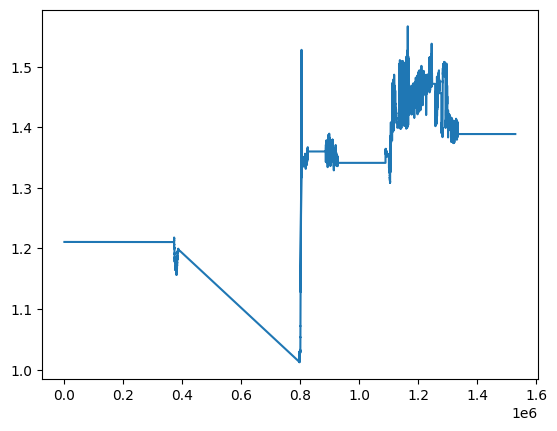

In [377]:
plt.plot(data)

In [378]:
chopped_timeseries = chop_timeseries(data, 1000)

In [379]:
# Create colormap from red to blue with 200 colors
cmap = plt.get_cmap('winter', len(chopped_timeseries))

In [380]:
timeseries_plot = []
for i, timeserie in enumerate(chopped_timeseries):
    timeseries_plot.append({'t': np.linspace(i*len(timeserie), (i+1)*len(timeserie), len(timeserie)), 'x': timeserie, 'col': cmap(i)})

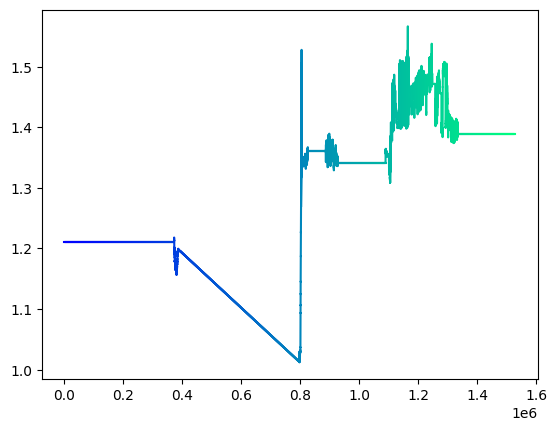

In [381]:
for timeserie in timeseries_plot:
    plt.plot(timeserie['t'], timeserie['x'], color=timeserie['col'])

In [400]:
# Load features
dwt = pd.read_csv("features/new_features/DWT_complete_samples.csv")
dwt.drop(columns=["Unnamed: 0"], inplace=True)
dwt.dropna(axis=1, inplace=True)

eemd = pd.read_csv("features/new_features/EEMD_complete_samples.csv")
eemd.dropna(axis=1, inplace=True)

emd = pd.read_csv("features/new_features/EMD_complete_samples.csv")
emd.dropna(axis=1, inplace=True)

no_decomp = pd.read_csv("features/new_features/noDecomp_complete.csv")
no_decomp.dropna(axis=1, inplace=True)

In [401]:
all_features = pd.concat([dwt, eemd, emd, no_decomp], axis=1)

In [402]:
all_features.dropna(axis=0, inplace=True)

In [403]:
all_features

,level_0_mean,level_0_std,level_0_skew,level_0_max,level_0_median,level_0_min,level_0_energy,level_0_entropy,level_0_zcr_mean,level_0_zcr_std,...,spec_contrast_mean,spec_contrast_std,spec_contrast_max,spec_contrast_median,spec_contrast_min,spec_bandwidth_mean,spec_bandwidth_std,spec_bandwidth_max,spec_bandwidth_median,spec_bandwidth_min
0,1.930169e-15,1.444055e-15,-0.112822,5.381112e-15,1.828399e-15,-1.724315e-15,5.810847e-30,5.828404e-27,0.0,0.0,...,17.939797,0.000000,17.939797,17.939797,17.939797,2583.242093,0.000000,2583.242093,2583.242093,2583.242093
1,1.906692e-15,2.220828e-15,0.674460,8.045647e-15,1.828399e-15,-2.390449e-15,8.567555e-30,8.500405e-27,0.0,0.0,...,16.180667,1.909293,18.089960,16.180667,14.271373,2318.246845,145.768782,2464.015627,2318.246845,2464.015627
2,1.906692e-15,2.220828e-15,0.674460,8.045647e-15,1.828399e-15,-2.390449e-15,8.567555e-30,8.500405e-27,0.0,0.0,...,16.180667,1.909293,18.089960,16.180667,14.271373,2318.246845,145.768782,2464.015627,2318.246845,2464.015627
3,1.906692e-15,2.220828e-15,0.674460,8.045647e-15,1.828399e-15,-2.390449e-15,8.567555e-30,8.500405e-27,0.0,0.0,...,16.180667,1.909293,18.089960,16.180667,14.271373,2318.246845,145.768782,2464.015627,2318.246845,2464.015627
4,1.906692e-15,2.220828e-15,0.674460,8.045647e-15,1.828399e-15,-2.390449e-15,8.567555e-30,8.500405e-27,0.0,0.0,...,16.180667,1.909293,18.089960,16.180667,14.271373,2318.246845,145.768782,2464.015627,2318.246845,2464.015627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1.672620e-15,3.259035e-15,-0.560303,6.959277e-15,2.133276e-15,-4.915773e-15,1.341897e-29,1.326824e-26,0.0,0.0,...,16.180667,1.909293,18.089960,16.180667,14.271373,2318.246845,145.768782,2464.015627,2318.246845,2464.015627
1526,1.672620e-15,3.259035e-15,-0.560303,6.959277e-15,2.133276e-15,-4.915773e-15,1.341897e-29,1.326824e-26,0.0,0.0,...,16.180667,1.909293,18.089960,16.180667,14.271373,2318.246845,145.768782,2464.015627,2318.246845,2464.015627
1527,1.672620e-15,3.259035e-15,-0.560303,6.959277e-15,2.133276e-15,-4.915773e-15,1.341897e-29,1.326824e-26,0.0,0.0,...,16.180667,1.909293,18.089960,16.180667,14.271373,2318.246845,145.768782,2464.015627,2318.246845,2464.015627
1528,1.672620e-15,3.259035e-15,-0.560303,6.959277e-15,2.133276e-15,-4.915773e-15,1.341897e-29,1.326824e-26,0.0,0.0,...,16.180667,1.909293,18.089960,16.180667,14.271373,2318.246845,145.768782,2464.015627,2318.246845,2464.015627


In [404]:
# Perform PCA on dwt dataframe
pca = PCA()
pca.fit(all_features)

PCA()

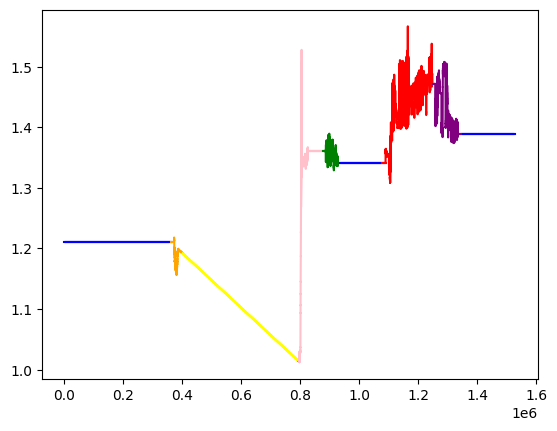

In [453]:
for i, timeserie in enumerate(timeseries_plot):
    if (i > 1075) and (i < 1250):
        plt.plot(timeserie['t'], timeserie['x'], color="red")
    elif (i > 1250) and (i < 1350):
        plt.plot(timeserie['t'], timeserie['x'], color="purple")
    elif (i > 400) and (i < 795):
        plt.plot(timeserie['t'], timeserie['x'], color="yellow")
    elif (i > 795) and (i < 876):
        plt.plot(timeserie['t'], timeserie['x'], color="pink")
    elif (i > 875) and (i < 935):
        plt.plot(timeserie['t'], timeserie['x'], color="green")
    elif(i > 360) and (i < 410):
        plt.plot(timeserie['t'], timeserie['x'], color="orange")
    else:
        plt.plot(timeserie['t'], timeserie['x'], color="blue") #color=timeserie['col'])
plt.savefig("figures/timeseries.png")

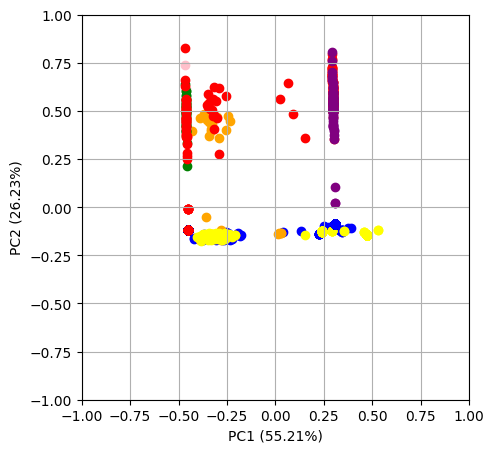

In [457]:
scores = pca.fit_transform(all_features)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

xs = scores[:,0]
ys = scores[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())
for i, (x, y) in enumerate(zip(xs, ys)):
    if (i > 1075) and (i < 1250):
        plt.scatter(x * scalex, y * scaley, color="red")
    elif (i > 1250) and (i < 1350):
        plt.scatter(x * scalex, y * scaley, color="purple")
    elif (i > 400) and (i < 775):
        plt.scatter(x * scalex, y * scaley, color="yellow")
    elif (i > 795) and (i < 876):
        plt.scatter(x * scalex, y * scaley, color="pink")
    elif (i > 875) and (i < 935):
        plt.scatter(x * scalex, y * scaley, color="green")
    elif(i > 350) and (i < 410):
        plt.scatter(x * scalex, y * scaley, color="orange")
    else:
        plt.scatter(x * scalex, y * scaley, color="blue") #c=[cmap(i) for i in range(len(chopped_timeseries))])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.grid()
plt.show()
fig.savefig("figures/PCA.png", dpi=300)

In [416]:
explained_variance = pca.explained_variance_ratio_[:10] / np.sum(pca.explained_variance_ratio_[:10]) * 100

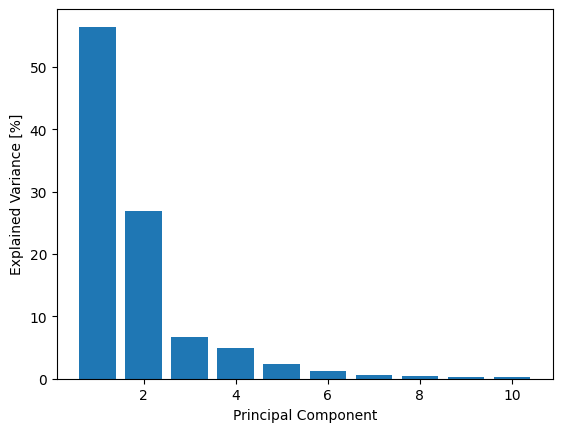

In [419]:
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance [%]")
plt.show()